<a href="https://colab.research.google.com/github/jakejasminjk/infoproj/blob/master/BirthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
sns.set_theme()

In [3]:
matplotlib.style.use('seaborn-dark-palette')

basic imports

In [4]:
fileName = "BirthMonthsData.csv"
birthDf = pd.read_csv(fileName)
birthDf.rename(columns={"Country or Area":"country/area","Year":"year"
                    ,"Area":"area","Month":"month","Record Type":"type",
                    "Reliability":"rel", "Number_of_Births":"births"},inplace=True)
birthDf.head()

,country/area,year,area,month,type,rel,births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267.0
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28.0
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24.0
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26.0
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16.0


# Global Birth Rates


Declining birth rates is an issue that many conutries have to deal with. It has several important implications such as a lower GDP because of the lack of workers to satisfy demand in the workforce. A decrease in birth rates also means that the country will have an ageing population that isn't been replenished. 

#Take notice of the distrubiton of births based on time


The average number of births per year


*   Peak numbers are at 1969
*   A trend of declining birth rates in the modern times
*   More people had kids back in the days compared to modern times





Text(0, 0.5, 'Number of Births')

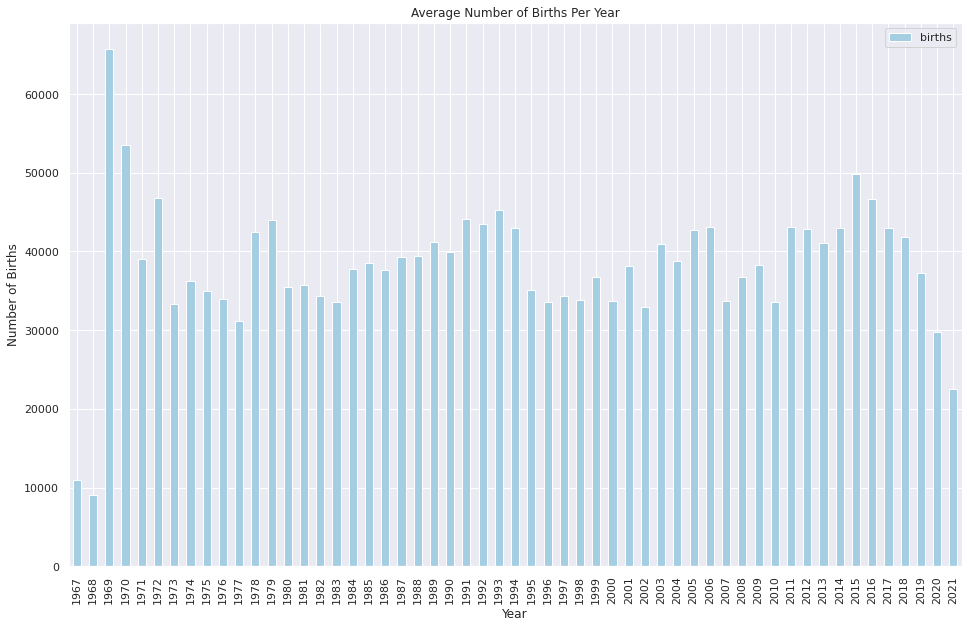

In [8]:
ax = birthDf.groupby('year').mean().plot(kind='bar',figsize=(16,10), title="Average Number of Births Per Year", colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")



*   The shift in birth rates may be due to global events
*   The the decline started to happen around the time of covid



Text(0, 0.5, 'Number of Births')

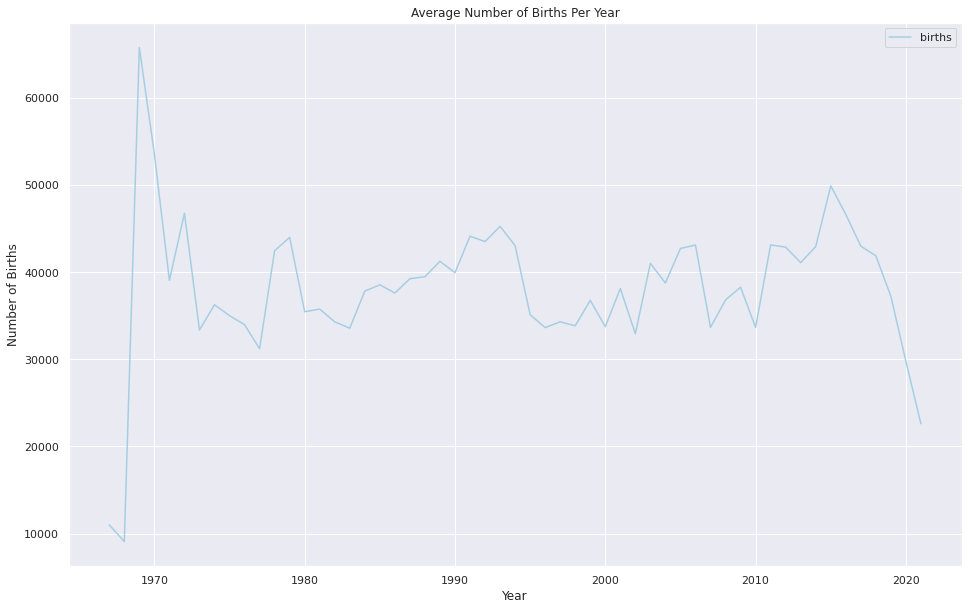

In [13]:

ax = birthDf.groupby('year').mean().plot(kind='line',figsize=(16,10),title="Average Number of Births Per Year", colormap="Paired")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Median number of births per year


*   The current trend for median number of births is postive
*   Current data doesn't allow for any meaningful insight into future trends because of volatility 






Text(0, 0.5, 'Number of Births')

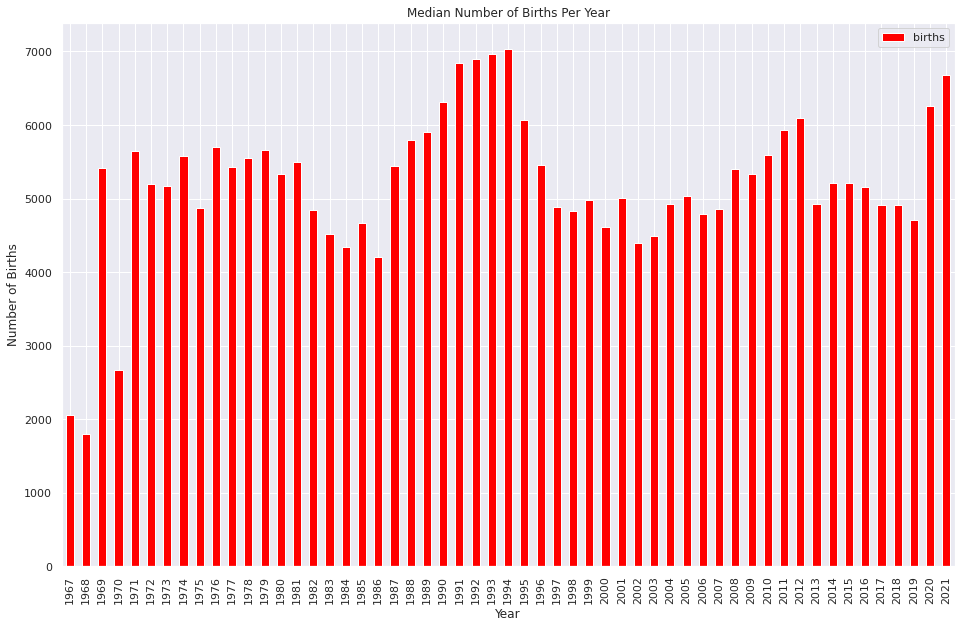

In [14]:
ax = birthDf.groupby('year').median().plot(kind='bar',figsize=(16,10),title="Median Number of Births Per Year", colormap="autumn")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Text(0, 0.5, 'Number of Births')

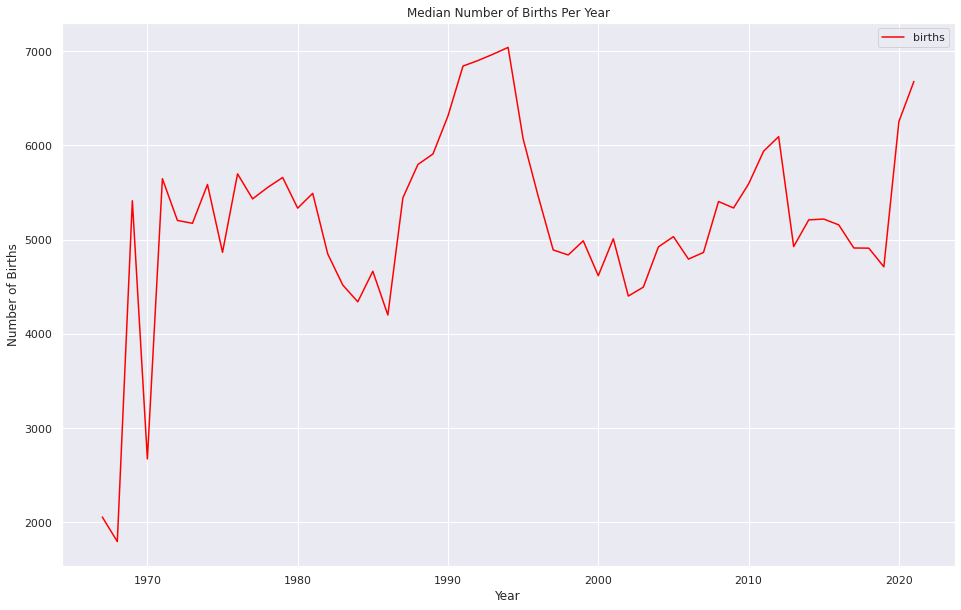

In [16]:
ax = birthDf.groupby('year').median().plot(kind='line',figsize=(16,10),title="Median Number of Births Per Year", colormap="autumn")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Standard deviation of births per yea



*   Showing a downward trend although not indicative of anything substantial



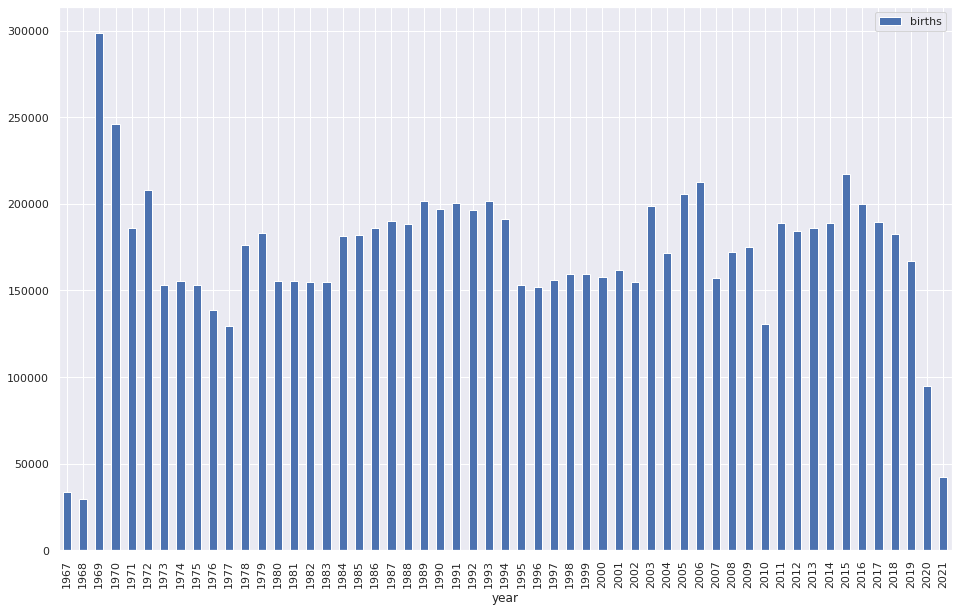

In [6]:
birthDf.groupby('year').std().plot(kind='bar',figsize=(16,10))

Average Number of births per month



*   The birth rate stays about consistant throughout the year for every month
*   Occasional dips may happen but nothing drastic



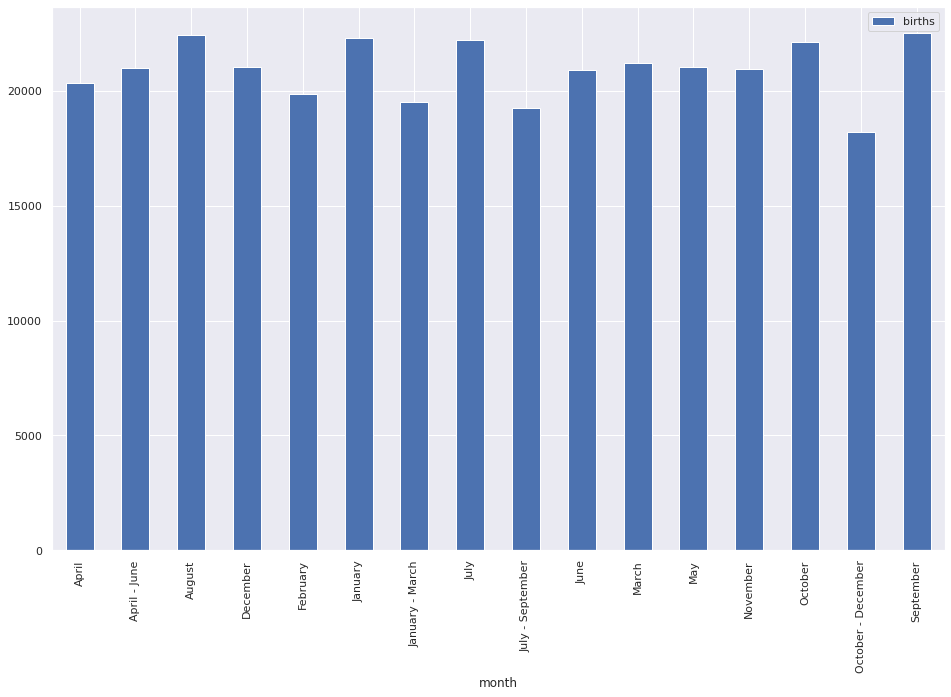

In [34]:
ax = birthDf.groupby(['month']).mean()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax.drop(ax.tail(2).index,inplace=True)
ax.plot(kind='bar',figsize=(16,10))

Median Births per Month

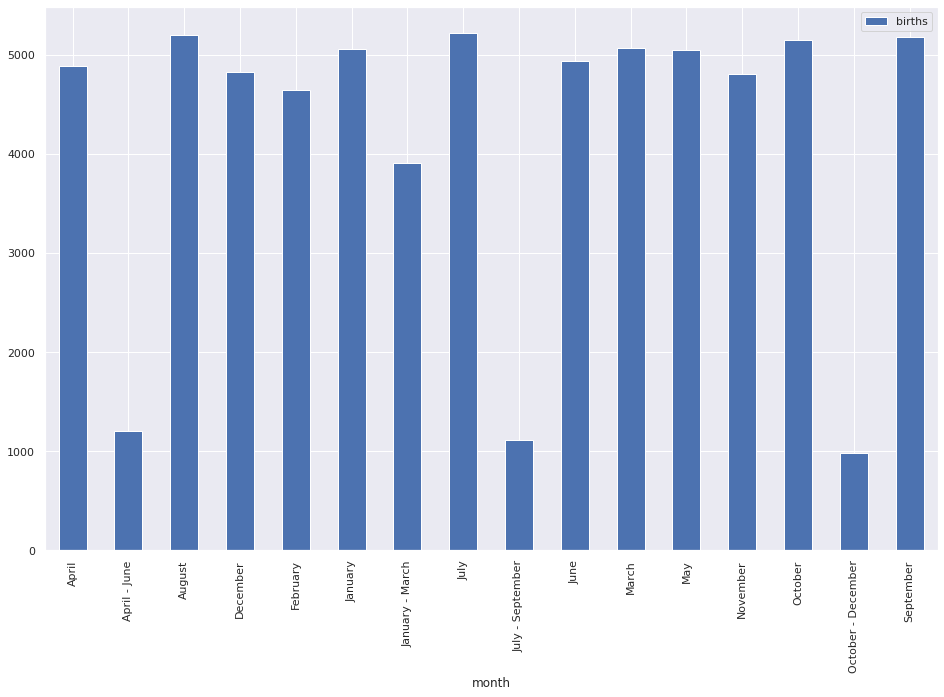

In [35]:
ax = birthDf.groupby('month').median()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax.drop(ax.tail(2).index,inplace=True)
ax.plot(kind='bar',figsize=(16,10))

In [13]:
birthDf.groupby(['year', 'month']).agg({'births': ['mean', 'min', 'max','median','std']})

births                                         
                              mean     min       max   median           std
year month                                                                 
1967 April             5391.600000    20.0   19172.0   1779.0   8037.127864
     August            6189.400000     7.0   22534.0   1977.0   9468.250593
     December          5798.800000     4.0   21402.0   1453.0   9031.843317
     February          5340.600000     7.0   19480.0   1952.0   8157.961406
     January           6300.400000    12.0   23041.0   2145.0   9668.268139
...                            ...     ...       ...      ...           ...
2021 January - March  44831.800000  4431.0  179776.0  13726.0  75537.621079
     July              2464.000000  2464.0    2464.0   2464.0           NaN
     June             22032.000000  1044.0  123823.0   4730.0  45089.708541
     March            20755.470588   430.0  128217.0   7759.0  34365.423415
     May              12639.357143   462.0  106661.0   4641.0  27455.244601

[870 rows x 5 columns]